# Feature Transformation*****************

## Feature Scaling
**Definition : A technique to standardize the independent features present in the data in a fixed range.**

**Note: use feature scaling just before model building.**

### Standardization(or z-score normalization)
**Definition : Technique to rescale features values with distribution value between 0 and 1 useful for optimization algorithms.**

**Formula : x_new=(x_old-x_mean)/std. dev.**

**Motive : mean centering, scaling by factor of standard deviation.**

### Topics covered:
1. How to Standardize?
2. Why is  Scaling important?
3. Effect of Standardization on Outliers.
4. When to and when not to use Standardization?
5. Why Standardization is known as z-score normalization?

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df1=pd.read_csv('Social_Network_Ads.csv')

#first 5 rows of dataframe
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#shape of data
df1.shape

(400, 5)

In [4]:
#remove unnecessary features(here, User ID, Gender)
df1=df1.iloc[:,2:]
#first 5 rows of data
df1.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
#random rows
df1.sample(5)

,Age,EstimatedSalary,Purchased
368,38,71000,0
274,57,26000,1
196,30,79000,0
216,49,65000,0
155,31,15000,0


### Standard Scalar

In [6]:
#recommended(train-test split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Purchased', axis=1), df1['Purchased'], test_size=0.3, random_state=0)

In [7]:
#Shapes 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

In [8]:
#Standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scalar.fit(X_train)

# transform train and test sets
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [9]:
#mean of all features of X_train(here, Age and EstimatedSalary)
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
#standard deviation of all features of X_train(here, Age and EstimatedSalary)
scalar.scale_

array([1.01999375e+01, 3.45792870e+04])

In [11]:
#by-default standardization converts dataframe into array
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
#so we need to convert back array into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
#scatistical info before scaling
np.round(X_train.describe(),1)
#observation:comapare mean and std dev of Age and EstimatedSalary(oh! a lot of difference and hence are not comparable)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
#scatistical info after scaling
np.round(X_train_scaled.describe(),1)
#observation:comapare mean and std dev of Age and EstimatedSalary(now comparable as mean of both is approx 0 and std dev is 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


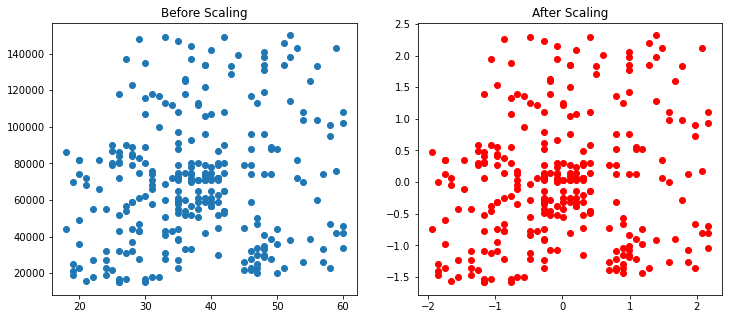

In [15]:
#Scatter plots for 'Age' wrt 'EstimatedSalary' before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

plt.show()
#observation:there is no difference in distribution of 'Age' wrt 'EstimatedSalary', just scale is changed

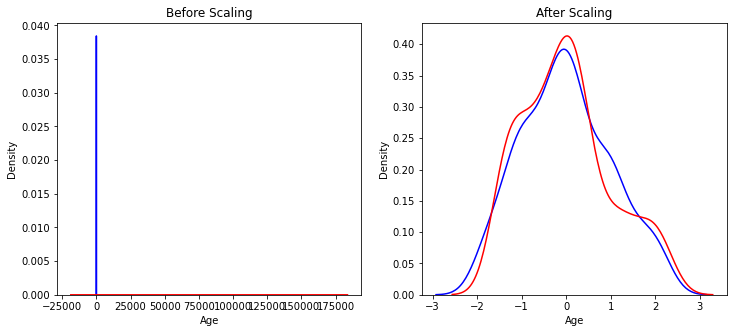

In [16]:
#Combined Kernal Density Estimator graphs(kdeplot) for 'Age' and EstimatedSalary' before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(X_train['Age'], ax=ax1, color='blue')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, color='red')
ax1.set_title('Before Scaling')

sns.kdeplot(X_train_scaled['Age'], ax=ax2, color='blue')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, color='red')
ax2.set_title('After Scaling')

plt.show()

#Observation:
#before scaling-->age(blue) is spread in very low range as compared to EstimatedSalary(both are non-comparable), that's why density of age looks vertical and that of EstimatedSalary looks horizontal(spread)
#after scaling-->now both age and EstimatedSalary are in same range(somewhere bw [-3,3]), comparable.

#hence:scaling makes features comparable

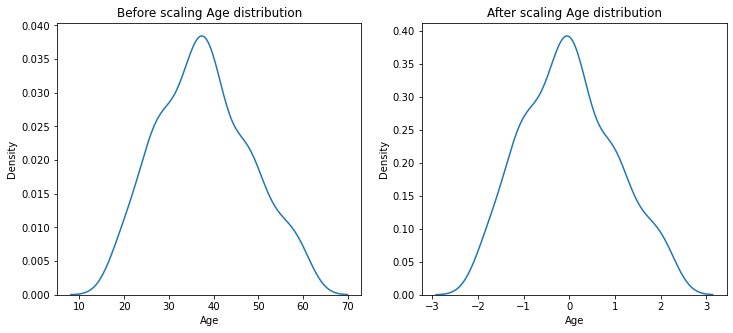

In [17]:
#Kernal Density Estimator graphs(kdeplot) for 'Age' before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(X_train['Age'], ax=ax1)
ax1.set_title('Before scaling Age distribution')

sns.kdeplot(X_train_scaled['Age'], ax=ax2)
ax2.set_title('After scaling Age distribution')

plt.show()
#observation:there is no change in distribution of data, only scale of data is changed

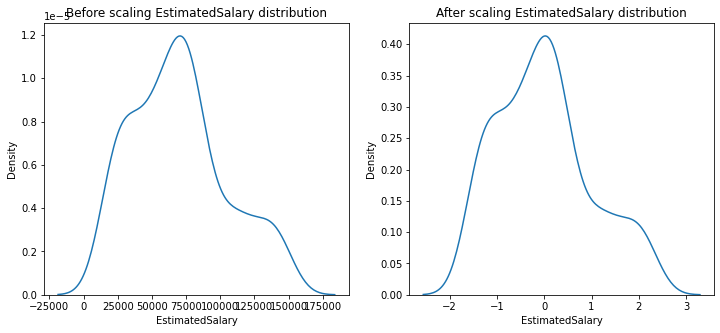

In [18]:
#Kernal Density Estimator graphs(kdeplot) for 'EstimatedSalary' before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.set_title('Before scaling EstimatedSalary distribution')

sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_title('After scaling EstimatedSalary distribution')

plt.show()
#observation:there is no change in distribution of data, only scale of data is changed

**Note:On standardization there is no change in the shape of distribution.**

Only mean is centered(becomes 0) and standard deviation is scaled(becomes 1)

### Why Scaling is Important?
we have taken examples of two algorithms 
1. logistic regression: we will see change in accurary before and after scaling.
2. Decision Tree : we won't see much change in accuracy before and after scaliing.

**So we conclude, on applying scaling there is no loss in accuracy but profit depends on type of algorithm**

#### LogisticRegression

In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()
#observation:created 2 objects(lr and lr_scaled) of LogisticRegression

In [20]:
#fit algorithms on before and after scaled data
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
#calculated predicted values of test data before and after scaling
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [22]:
#find accuracy of data before and after scaling
from sklearn.metrics import accuracy_score
print("Before Scalaling Accuracy : ",accuracy_score(y_test, y_pred))
print("After Scalaling Accuracy : ",accuracy_score(y_test, y_pred_scaled))
#observation:there is huge increase in accuracy score after scaling

Before Scalaling Accuracy :  0.6583333333333333
After Scalaling Accuracy :  0.8666666666666667


#### DecisionTreeClassifier

In [23]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()
#observation:created 2 objects(lr and lr_scaled) of LogisticRegression

In [24]:
#fit algorithms on before and after scaled data
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [25]:
#calculated predicted values of test data before and after scaling
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [26]:
#find accuracy of data before and after scaling
print("Accuracy before scaling", accuracy_score(y_test, y_pred))
print("Accuracy after scaling", accuracy_score(y_test, y_pred_scaled))
#observation:there is approximately no increase in accuracy score after scaling

Accuracy before scaling 0.875
Accuracy after scaling 0.8583333333333333


**Hence, increase in accuracy score after standardization(scaling) depends on the type of algorithm applied**

In [27]:
df1.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Effect of Sdandardization on Outliers

In [28]:
#since in data given there are no outliers, so let's add 3.
df1 = df1.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [29]:
#sample of data
df1.sample()

,Age,EstimatedSalary,Purchased
245,51,146000,1


In [30]:
#shape of data has changed
df1.shape

(403, 3)

In [31]:
#statistical information after adding outliers
df1.describe()
#observation-->now we can see values have cahnged(like, min, max etc.)

,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.846154,70714.640199,0.359801
std,11.255343,37959.790969,0.480539
min,5.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


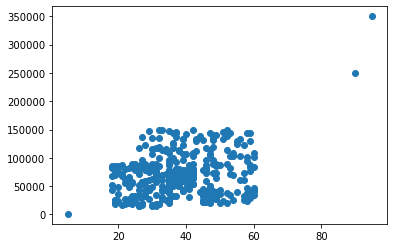

In [32]:
#scatter plot of 'Age' and 'EstimatedSalary'
plt.scatter(df1['Age'], df1['EstimatedSalary'])
#observation-->yes, now we can see outliers

In [33]:
#recommended(train-test split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Purchased', axis=1), df1['Purchased'], test_size=0.3, random_state=0)

In [34]:
#Standardization

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(X_train)

X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [35]:
#By-default StandardScalar converts dataframes into arrays, so we need to convert them back
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [36]:
#statistical information after adding scaling(X_train_scaled)
X_train_scaled.describe()
#observation-->now we can see values have cahnged(like, min, max etc.)

,Age,EstimatedSalary
count,2.820000e+02,2.820000e+02
mean,1.976354e-16,3.936961e-17
std,1.001778e+00,1.001778e+00
min,-3.025456e+00,-1.930537e+00
25%,-7.437417e-01,-7.405668e-01
50%,-1.048617e-01,-3.225098e-02
75%,7.165553e-01,4.989859e-01
max,4.732372e+00,5.124288e+00


In [37]:
#statistical information after adding outliers(X_test_scaled)
X_test_scaled.describe()
#observation-->now we can see values have cahnged(like, min, max etc.)

,Age,EstimatedSalary
count,121.000000,121.000000
mean,-0.092039,0.148750
std,1.085885,1.228552
min,-1.838964,-1.533881
25%,-1.017547,-0.627236
50%,-0.196130,0.081080
75%,0.625287,0.562734
max,5.188715,7.957552


Text(0.5, 1.0, 'after scaling')

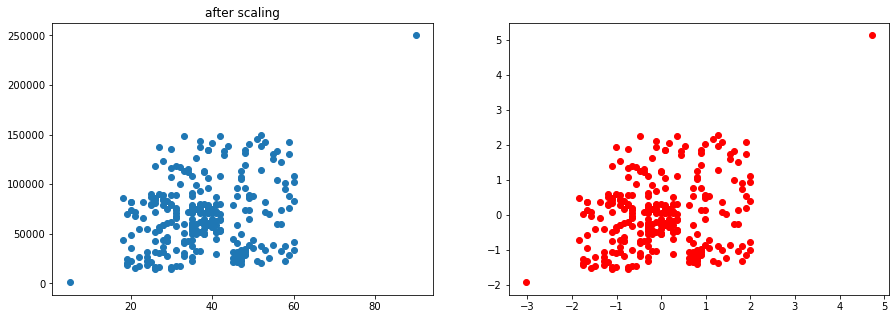

In [38]:
#Scatter plots of 'Age' and 'EstimatedSalary' before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('before scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax1.set_title('after scaling')

#Observation:outlier is still outlier, means there is no impact of scaling on outliers
#Note:out of 3 outliers added, 1 is gone into test data(so, don't get confused)

**So we have to handle outliers explicitely.**

### When to use Standardization?
There is no loss in using Standardization, but profit depends on type of algorithm.

**Algorithms** whenever you see these algorithms, use standardization scaling technique.
1. K-Means : Use Euclidean Distance measure.
2. K-Nearest-Neighbours : measure distance between pairs of samples and these distances are influenced by measurement units
3. Principal Component Analysis : To get feature with maximum variance
4. Artificial Neural Network : Apply Gradient Descent
5. Gradient Descent : Theta calculation becomes faster after feature scaling and learning rate in update equation of Stochastic gradient descent is the same for every parameter.

**When there is no need to use Standardization?**
1. Decision tree 
2. Random Forest
3. Gradient Boost
4. XG Boost

### Why Standardization is known as z-score normalization?

Because it returns a normalized value(z-score) based on mean and standard deviation. 

**END of Document.**